# Responsible AI

Once a model is in prod. it's impact extends far beyond the teams who built it

Several stakeholders for a model:
- Model Builders
    - Data Scientists and ML Researchers directly involved in building the model
- ML Engineers
    - Members of MLOPs teams directly involed in deploying the model
- Business Decision Makers
    - Decide to incoroportate the model into their business process or not
    - Need to evaluate if the model is fit for purpose
- End Users of ML systems
    - Make us of predictions from an ML model.
    - Example users: cutomers, employees and hybrids of these. 
- Regulatory and Compliance Agencies
    - People and organisations who need to execturve-level summary of how a model is making decisions from a regulatory compliance perspective. This could include financial auditors, government agencies etc...
    
Heuristic Benchmark design pattern provides a way of putting the models performance in a context that end users and decision makes can understand. The explainable predictions pettern provides approaches to improving trust in ML systems by fostering an understanding of the signals a model is using to make predictions. The fairness lens design pattern aims to ensure that models behave equitable across different subsets of users and predictions scenarios.

## Design Pattern 28: Heuristic Benchmark

Heuristic benchmark pattern compares an ML model against a simple, easy-to-understand heuristic in order to explain the models performance to business decision makers

### Problem

- When reporting metrics of a model its difficult to determine if this model is good or bad
    - e.g. the mean absolute error of a taxi ride length prediction is 1,200 seconds. Is this good or bad?
- Models performance is stated in cold hard numbers that are difficult for end users to put into context

### Solution

- If this a second ML model being developed it's easy to compare it against the earlier version
- If it's the very first model the solution is to create a simple benchmark for the sole purpose of comparing against our newly developed ML model. The heuristic benchmark.
- A good heuristic benchmark should be simple to understand and relately trivial to compute
    - If we have to defend the algorithm we need to use a simplier one
    - Good heuristics are rules of thumb, constants or bulk statistics 
    - Avoid the temptation to train even a simple ML model
    
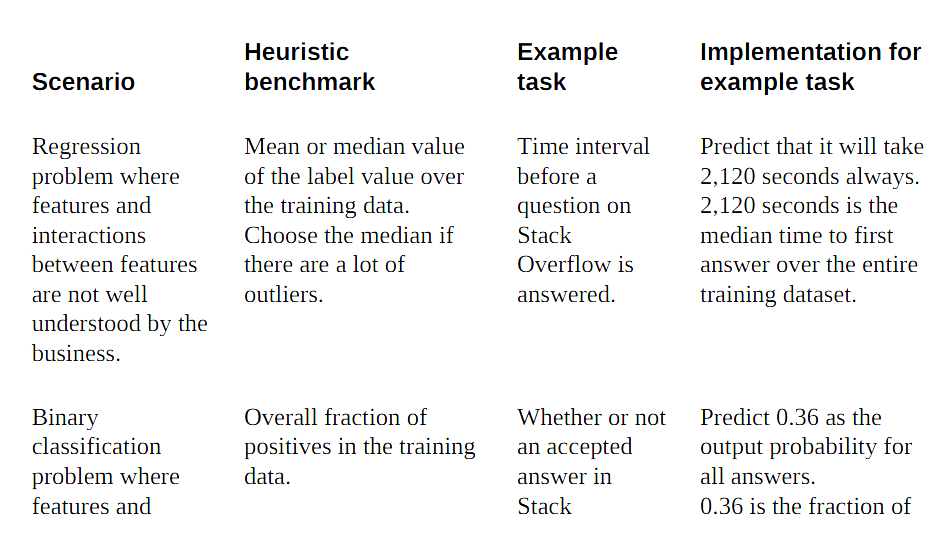

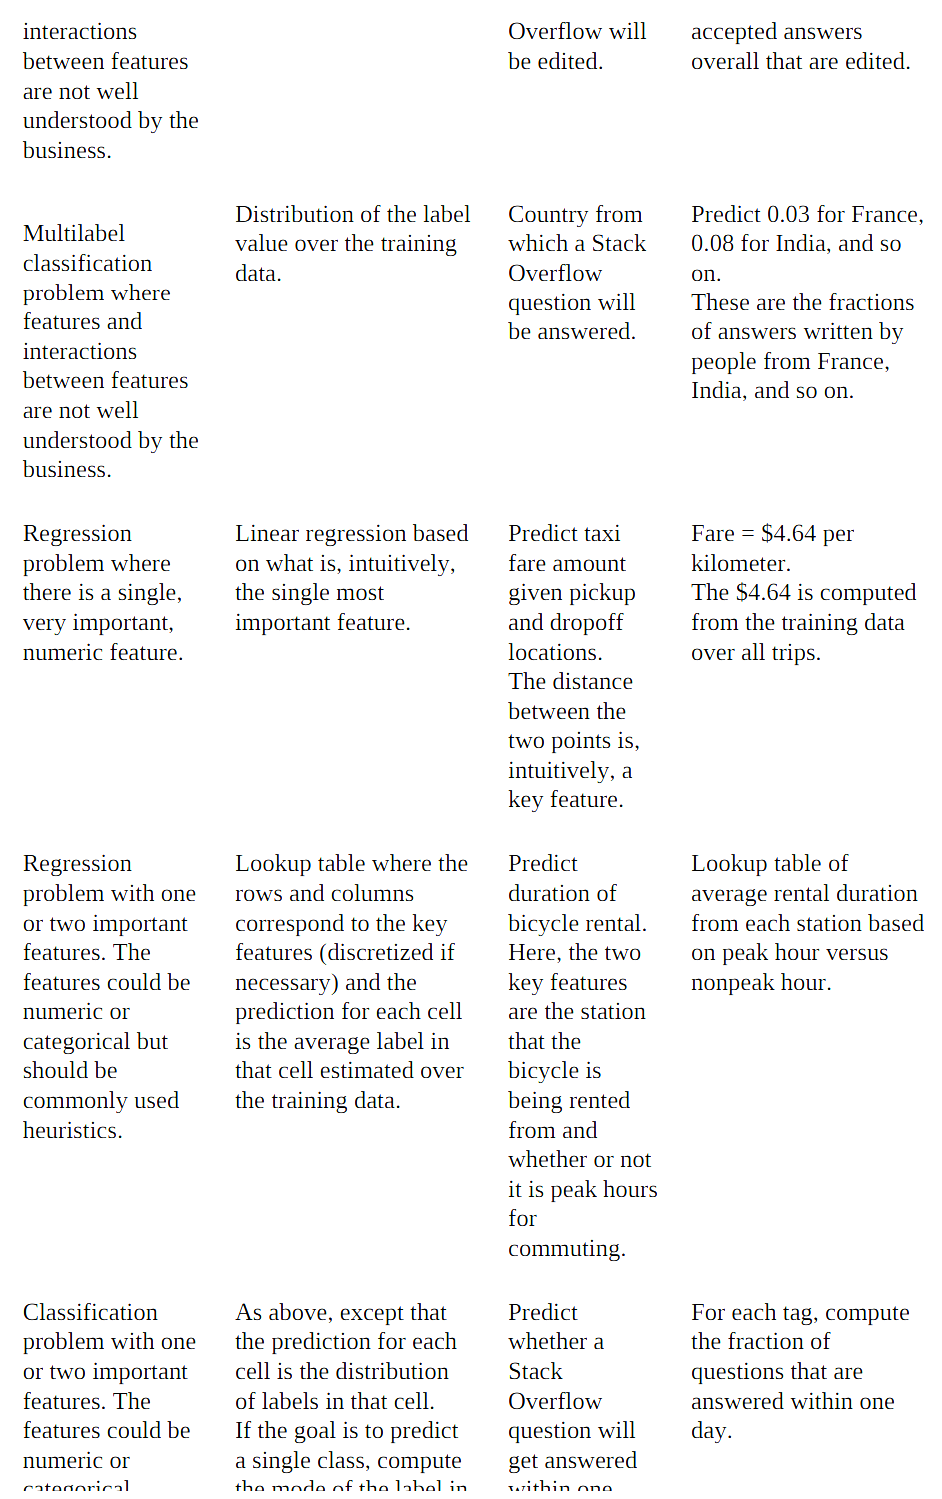

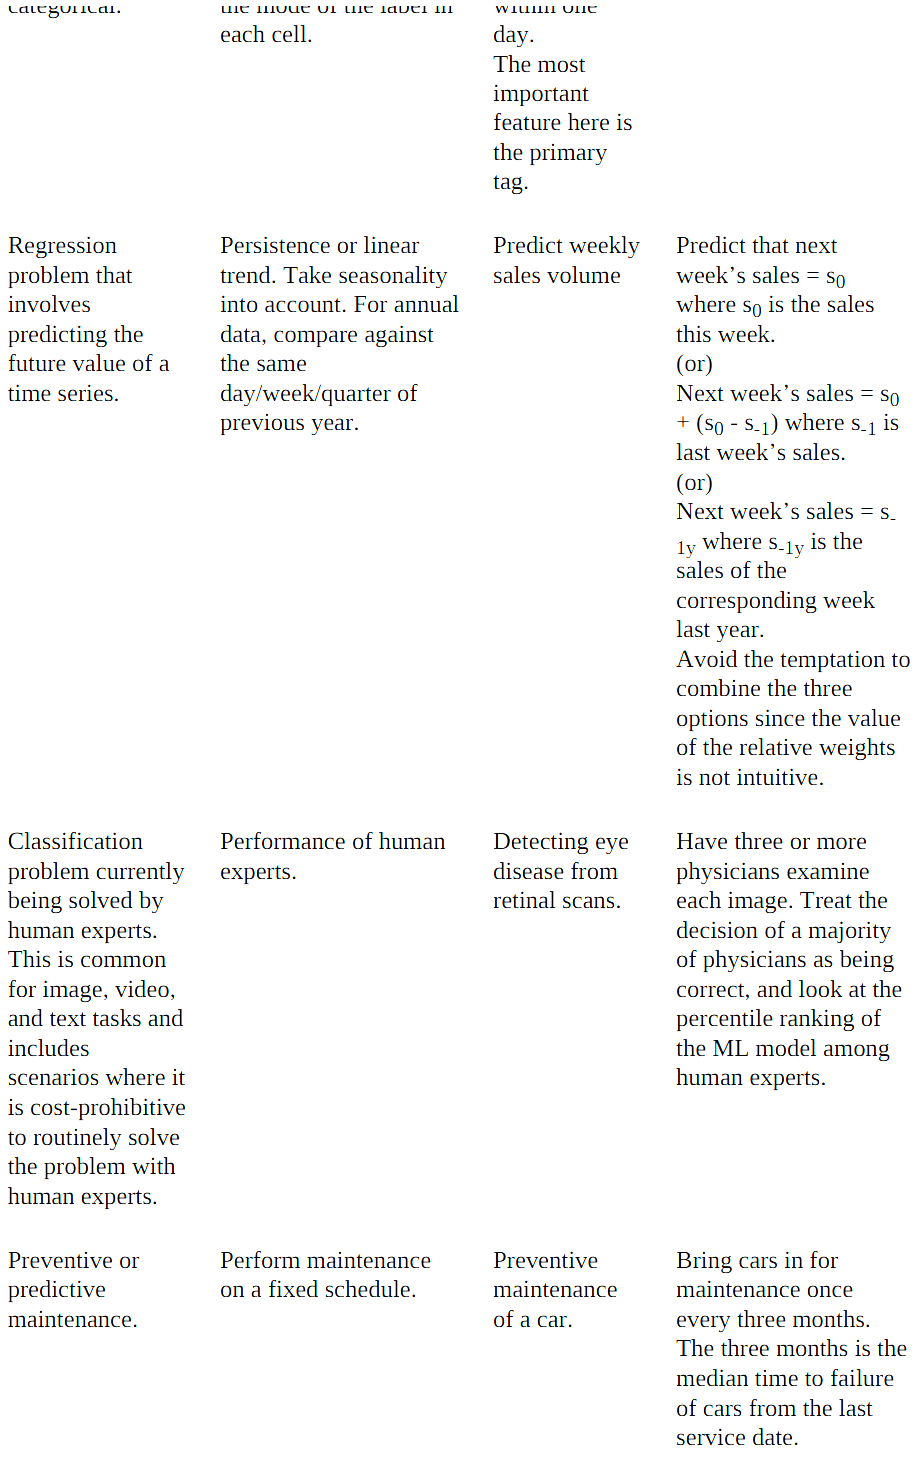

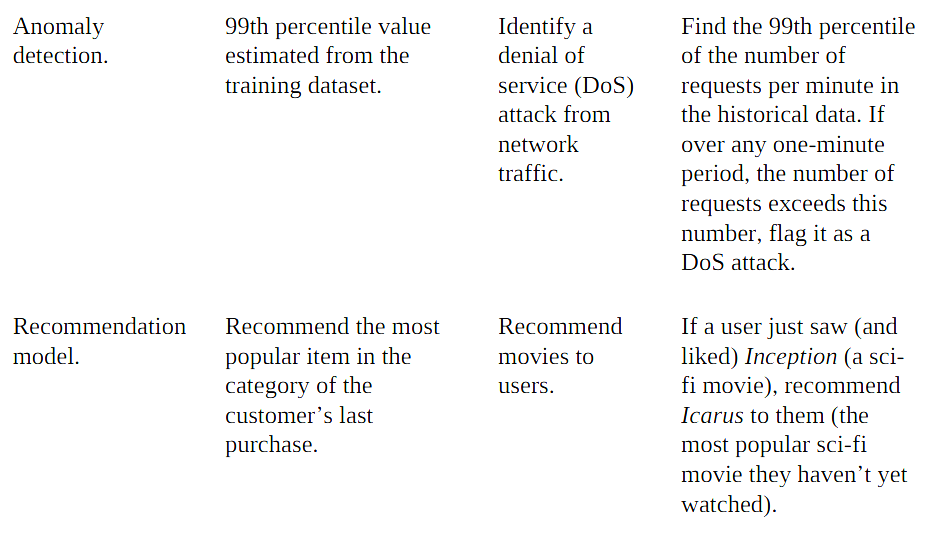


The table above refers to "important features". These are important because they are widely accepted within the business as having a well-understood impact on the prediction problem.

### Trade-Offs and Alternatives

#### Development Check
- Heuristic benchmark is useful beyond providing explaining the importance of ML modles
- It can help diagnose probelms with a particular model approach
- E.g.
    - Heutric model predicts duration of bike rentals near station by taking the average duration only on weekdays
    - When we build the ML model good to compare against this model
    - To do this, we will be evaluating model perforance on different statifications of the evaluation dataset
    - We can then diagnose whether our model is overemphasing the busy, popular stations and ingnoring infrequent stations in the training data 
    - If this happens we can experiment with increasing model complexity or balancing the dataset to overweight less popular stations
    
    
#### Human Experts

- Classification problems use experts
- Multiple opinions identify the extent to which humans make errors and compare the error rate of the model against that of human experts
- Can use experts even if we have actual ground truth

#### Utility Value

- If we prove the ML model is say 1% better than the heuristic model the next question could be "Is a 1% improvement good enough?", "Is it worth putting the ML model into production rather than deploying the heuristic model?"
- Important to translate the models value into utility value
    - This could be monetary, better search results, earlier disease detection


## Design Pattern 29: Explainable Predictions

- Increases trust in ML systems by providing users with an understanding oh how and whay models make certain predictions
- For all models it is useful to interpret predictions in order to understand the combinations of features influencing model behaviour

#### Problem

- Typical metrics e.g. accuracy, precision, recall, etc... tell you how correct the model is but does not give insight into why a model arrived at those predictions
- Models can only be improved to a certain point without an understanding of the features it's relying on to make predictions

#### Solution

- Use explainability
    - Can help reveal bias
    - Explains what's going on under the hood of a model
- Models like decisons trees and linear regression and interpretable by design
    - e.g. the co-efficients of a linear regression model give insight into the model
        - Be careful here, the co-efficients don't tell you the relationship between features especially if they are different units e.g. if one feature is the number of cylinders in a car and another in the vehicles weight. Get more complex when you introduce one-hot encoded features.



- When models are more complex we rely on _post hoc_ explainability methods to approximate the relationships between the models features and it's output
- Typicall, post hoc methods don't rely on the models internals like learned weights
- Many methods in this area, one of them is _feature attributions_
    - Maps the relationship between the feature inputs to the models outputs
- Two types of feature attribution:
    - *Instance level*: Explain the models output for an individual prediction. Useful when trying to dive deeper on a single prediction
    - *Global*: Analyses the models behaviour across an aggregate to draw conclusions about how the model is behaving as a whole. Typically done by averaging instance-level feature attributions from the test dataset. Will tell you overall what certain features lead to certain predictions.


    
- Two methods to approach instance-level and global explainations:
    - *Sampled Shapley*
        - This approach determines a features marginal contribution by calculating how much adding and removing that feature affects a prediction, analysed over multiple conginations of feature values
        - [Paper](https://oreil.ly/ubEjW)
    - *Integratied Gradients (IG)*
        - Using a predefined model baseline, IG calculates the derivaties (gradients) along the apth from this baseline to a specific input
        - [Paper](https://oreil.ly/sy8f8)
        
        
- [Google Paper on AI Explainations](https://cloud.google.com/vertex-ai/docs/tabular-data/classification-explanations)
- [Tool: Pytorch - Captum](https://github.com/pytorch/captum)
    - [Captum Docs](https://captum.ai/api/index.html)